# Logistic Regression exercise

# 先设置画图的分辨率、大小等信息

In [576]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline
plt.rcParams['figure.figsize'] = (15., 6.) # 设置figure_size的尺寸
plt.rcParams['image.interpolation'] = 'nearest' # 设置插值风格
plt.rcParams['image.cmap'] = 'gray' # 设置颜色style

# 保证ipynb里的都是最新版本，在修改了模块代码后不用重新刷新kenel
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [577]:
data = pd.read_csv('./datasets/MNIST.csv',header=0).values # 文件的第0行为列索引
imgs = data[0::,1::] # 从第1行第2列开始的所有数据
labels = data[::,0] # 第一列的所有数据为label

10


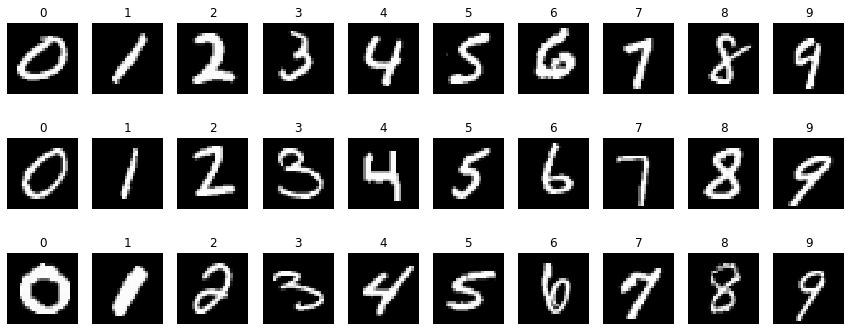

In [578]:
classes = range(10)
num_classes = len(classes)
samples_per_class =3
for y, cls in enumerate(classes): # 采用枚举的方式循环
    idxs = np.flatnonzero(labels == y) # 找到值为y的label的位置
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1 # 在每次循环中找到idx中相应的y/label的位置
        plt.subplot(samples_per_class, num_classes, plt_idx)
        # print(plt_idx)
        plt.imshow(imgs[idx].reshape(28,28).astype('uint8'))
        plt.axis('off')
        plt.title(cls)
print(num_classes)
plt.show()

# Binary classification
We use the Logistic Regression to classification handwritten digits wheather it's zero or not. If the handwritten digits is '0' , then the label is 0, otherwise, the label is 1.

In [579]:
from bitstring import xrange

# transform the labels to binary
for i in xrange(len(labels)): # 循环遍历42000个label
    if labels[i] != 0:
        labels[i] = 1


split_index = len(labels) * 2 // 3 # 取整，相除

X_train = imgs[:split_index] # 从开头到整个数据集的2/3处，用于训练
y_train = labels[:split_index]

X_test = imgs[split_index:] # 从2/3处到1的数据集，用于测试
y_test = labels[split_index:]

'''
例如，在生成“X_train”的过程中
ones()函数负责生成(28000,1)的矩阵 
X_train()负责将(28000,784)与(28000,1) merging into the matrix of(28000,785)
'''
X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))]) 
X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])


print (X_train.shape)
print (X_test.shape)

(28000, 785)
(14000, 785)


In [580]:
# X_train_feats = None # choose and extract features
# X_test_feats = None # choose and extract features
X_train_feats = (X_train - np.mean(X_train)) / np.std(X_train)
X_test_feats = (X_test - np.mean(X_test)) / np.std(X_test)

print(X_train_feats)
print('——————————————————————————————————————————————————————————————')
print(X_test_feats)

[[-0.42419887 -0.42419887 -0.42419887 ... -0.42419887 -0.42419887
  -0.41147529]
 [-0.42419887 -0.42419887 -0.42419887 ... -0.42419887 -0.42419887
  -0.41147529]
 [-0.42419887 -0.42419887 -0.42419887 ... -0.42419887 -0.42419887
  -0.41147529]
 ...
 [-0.42419887 -0.42419887 -0.42419887 ... -0.42419887 -0.42419887
  -0.41147529]
 [-0.42419887 -0.42419887 -0.42419887 ... -0.42419887 -0.42419887
  -0.41147529]
 [-0.42419887 -0.42419887 -0.42419887 ... -0.42419887 -0.42419887
  -0.41147529]]
——————————————————————————————————————————————————————————————
[[-0.42459107 -0.42459107 -0.42459107 ... -0.42459107 -0.42459107
  -0.41188779]
 [-0.42459107 -0.42459107 -0.42459107 ... -0.42459107 -0.42459107
  -0.41188779]
 [-0.42459107 -0.42459107 -0.42459107 ... -0.42459107 -0.42459107
  -0.41188779]
 ...
 [-0.42459107 -0.42459107 -0.42459107 ... -0.42459107 -0.42459107
  -0.41188779]
 [-0.42459107 -0.42459107 -0.42459107 ... -0.42459107 -0.42459107
  -0.41188779]
 [-0.42459107 -0.42459107 -0.424591

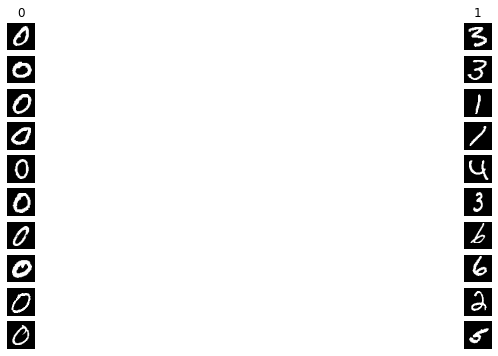

In [581]:
# Visualize some examples from the dataset.
# We show a few examples of training images from each class.
classes = range(2)
num_classes = len(classes)
samples_per_class = 10
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(labels == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(imgs[idx].reshape(28,28).astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [582]:
from classifiers.logistic_regression import LogisticRegression

# Start training. 

classifier = LogisticRegression()
loss_history = classifier.train(
    X_train_feats, 
    y_train,
    learning_rate = 0.1,
    num_iters = 150,
    batch_size = 300, # 每次训练的数量，此数值越大，图像的方差越小
)

iteration 0 / 150: loss 0.699891
iteration 50 / 150: loss 0.024853
iteration 100 / 150: loss 0.018461


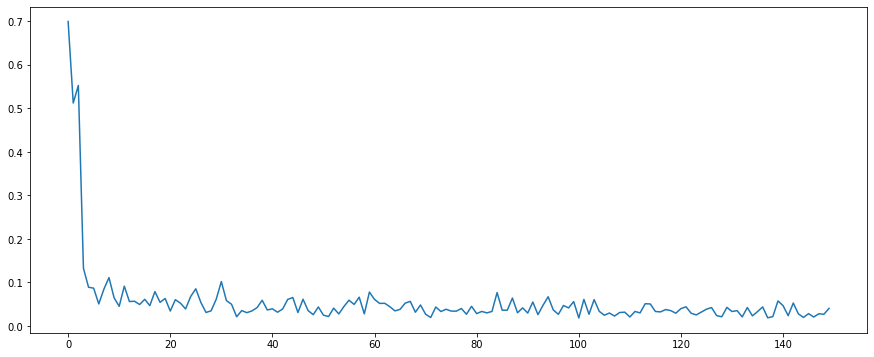

In [583]:
plt.plot(loss_history)

In [584]:
y_test_pred = classifier.predict(X_test_feats)
print("The accuracy socre is ", np.mean(y_test == y_test_pred))

The accuracy socre is  0.99



### F1-Measure
Notice that, if our model always output '1', totally ignoring the input X, we can get a accuracy 90%.So, in this assignment, accuracy is not efficient enough. 

We will use F1-Measure to evaluate our model.

You may need this:
[F1-Measure](https://baike.baidu.com/item/f-measure/913107?fr=aladdin)

In [585]:
# Calculate the precision(准确率), recall(召回率) and F1
# important： We should consider label '0' as 'positive' here. 
# That means 'True positive' ==> '(y_test == 0) and (y_test_pred == 0)'

TP = 0.0
FP = 0.0
FN = 0.0
TN = 0.0

#calculate TP
for it in range(785):
    if y_test_pred[it] == 0 and y_test[it] == 0:
        TP += 1.0
# print TP

#calculate FP
for it in range(785):
    if y_test_pred[it] == 0 and y_test[it] == 1:
        FP += 1.0
# print FP

#calculate FN
for it in range(785):
    if y_test_pred[it] == 1 and y_test[it] == 0:
        FN += 1.0
# print FN

#calculate TN
for it in range(785):
    if y_test_pred[it] == 1 and y_test[it] == 1:
        TN += 1.0
# print TN
    
precision = TP /(TP + FP)

recall = TP / (TP + FN)
    
print(precision)
print(recall)
print('F1:', precision*recall*2/(precision+recall))

0.9659090909090909
0.9770114942528736
F1: 0.9714285714285714


you should get the F1 higher than 85%.

# Multiclass classification

Now, we use the Logistic Regression to classification handwritten digits. There are 10 class, from '0' to '9'.


Hint: The method "one vs all" may helpful. [Here is the introduction to "one vs all"](https://msdn.microsoft.com/library/en-us/Dn905887.aspx). 

In [586]:
# Read the data for you
data = pd.read_csv('./datasets/MNIST.csv',header=0).values # change the path by yourself
imgs = data[0::,1::]
labels = data[::,0]
        
# 2/3 training set
# 1/3 test set
split_index = len(labels) * 2 // 3
X_train = imgs[:split_index]
y_train = labels[:split_index]
X_test = imgs[split_index:]
y_test = labels[split_index:]

X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])

# print y_train
# print y_test

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(28000, 785)
(28000,)
(14000, 785)


In [587]:
# X_train_feats = None # choose and extract features
# X_test_feats = None # choose and extract features
X_train_feats = (X_train - np.mean(X_train)) / np.std(X_train)
X_test_feats = (X_test - np.mean(X_test)) / np.std(X_test)

In [588]:
# Start training. 

classifier = LogisticRegression()
classifier.one_vs_all(
    X_train_feats, 
    y_train,
    learning_rate = 1e-3,
    num_iters = 500,
    batch_size = 64,
)

it =  0
iteration 0 / 500: loss 0.688514
iteration 50 / 500: loss 0.302083
iteration 100 / 500: loss 0.145416
iteration 150 / 500: loss 0.111390
iteration 200 / 500: loss 0.140845
iteration 250 / 500: loss 0.082275
iteration 300 / 500: loss 0.246802
iteration 350 / 500: loss 0.098270
iteration 400 / 500: loss 0.085653
iteration 450 / 500: loss 0.055316
it =  1
iteration 0 / 500: loss 0.695488
iteration 50 / 500: loss 0.198485
iteration 100 / 500: loss 0.233720
iteration 150 / 500: loss 0.146795
iteration 200 / 500: loss 0.238826
iteration 250 / 500: loss 0.205350
iteration 300 / 500: loss 0.172797
iteration 350 / 500: loss 0.099324
iteration 400 / 500: loss 0.124555
iteration 450 / 500: loss 0.102598
it =  2
iteration 0 / 500: loss 0.708613
iteration 50 / 500: loss 0.264435
iteration 100 / 500: loss 0.211985
iteration 150 / 500: loss 0.293621
iteration 200 / 500: loss 0.191632
iteration 250 / 500: loss 0.183518
iteration 300 / 500: loss 0.126161
iteration 350 / 500: loss 0.234902
itera

In [589]:
y_test_pred = classifier.one_vs_all_predict(X_test_feats)
print( "The accruacy socre is ", np.mean(y_test == y_test_pred))

The accruacy socre is  0.0
